# Lab3

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Class work

In [27]:
data_path = "RentDataWeek2.csv"
rent = pd.read_csv(data_path) # can save a variable as the csv reference

In [28]:
print("Shape", rent.shape) # Outcome is (number of rows, number of columns)

Shape (265193, 21)


In [29]:
rent.head() # .head() shows first 5 rows

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,lat,long,state
0,6039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,NaN,-86.7065,al
1,6041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,33.3755,NaN,al
2,6041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,NaN,-86.7065,al
3,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,33.4226,-86.7065,al
4,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,33.3755,-86.8045,al


In [30]:
df = rent.copy() # copy() allows us to reference the original data without compromising the original data/data frame

In [31]:
df = df[(df["sqfeet"]>0) & (df["sqfeet"]<=10000)]

In [32]:
df = df[(df["price"] <= 15000) & (df["price"] >= 300)]

In [33]:
df = df[ (df["beds"]>=0) & (df["baths"]>=0) ]

In [34]:
print("Shape", rent.shape) #shape shows (number of rows, number of columns)

Shape (265193, 21)


In [35]:
print("Shape", df.shape) 

Shape (262578, 21)


### Task 1: Distribution Plots (10 points)
1. Plot a histogram of rental prices, after filtering unrealistic values (e.g., prices above $15,000).
2. Plot a histogram of square footage, after filtering out non-positive values.
3. (Optional) Compare rental price distributions separately for apartments and houses.

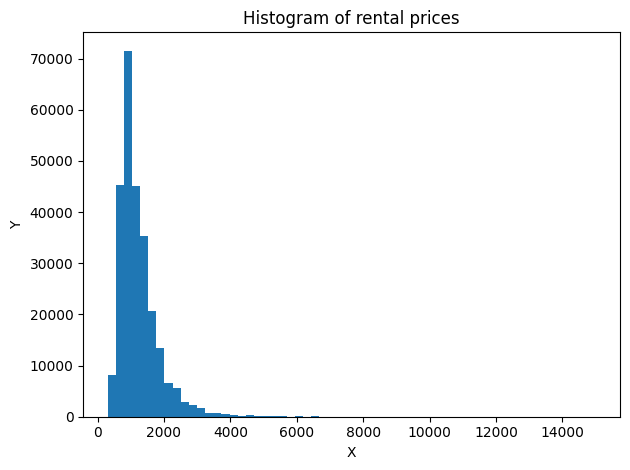

In [36]:
# Histogram of rental prices

plt.figure()
plt.hist(df["price"], bins=60) # .hist() creates histogram of variable in parenthesis
# specifying what column in dataset to create histogram because you can't do all of it
plt.title("Histogram of rental prices")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout() # does a clean up
plt.show() # shows the plot!

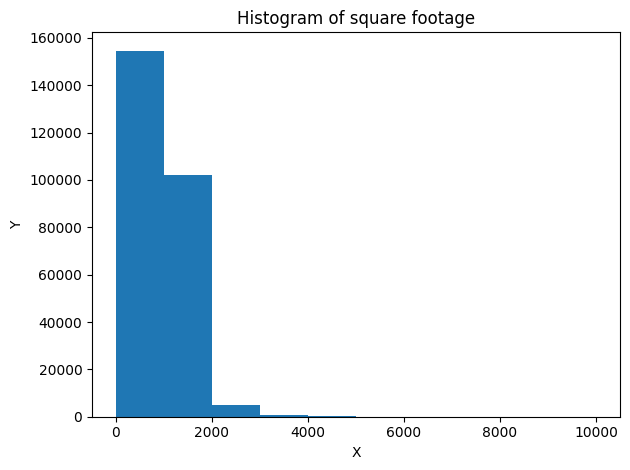

In [37]:
# Histogram of square footage
plt.figure()
plt.hist(df["sqfeet"], bins=10) # .hist() creates histogram of variable in parenthesis
# specifying what column in dataset to create histogram because you can't do all of it
plt.title("Histogram of square footage")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout() # does a clean up
plt.show() # shows the plot!

# observed that x was way out of proportion, so we set conditions on the beginning and end of the sqfeet to be between 0 and 1000

In [38]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'lat', 'long',
       'state'],
      dtype='object')

In [39]:
bedroom_price = df[(df["type"]=="bedroom") & (df["price"])]

In [40]:
apt_price = df[(df["type"]=="apartment") & (df["price"])]

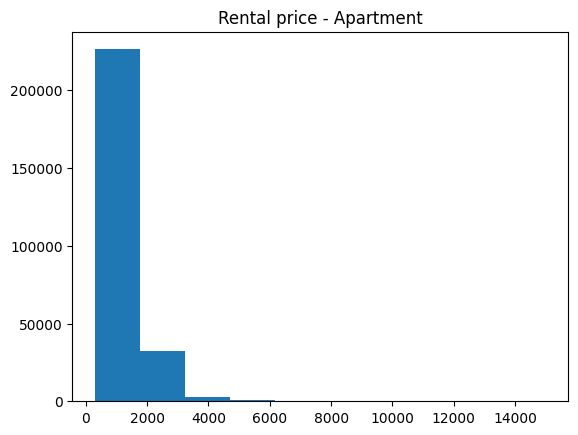

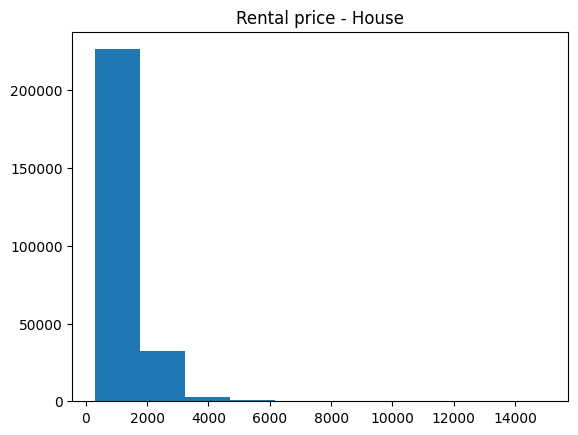

In [41]:
for t in ["apartment","house"]:
    sub = df[df["type"].str.lower() == t]

    plt.figure()
    plt.hist(df["price"],bins=10)
    plt.title(f"Rental price - {t.title()}") 
    plt.show()

### Task 2: Boxplots (10 points)
1. Create a boxplot of rental prices grouped by number of bedrooms (limit to a reasonable set,
e.g., 0–5).
2. Create a boxplot of rental prices grouped by property type (limit to the top 5 most frequent
types).
3. Interpret what these boxplots reveal about how rent changes across bedrooms and property
types.

/var/folders/hd/1hvfjm_11r70xv174w4my_hw0000gn/T/ipykernel_10266/363185519.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_bed,labels=[str(b) for b in bed_levels])


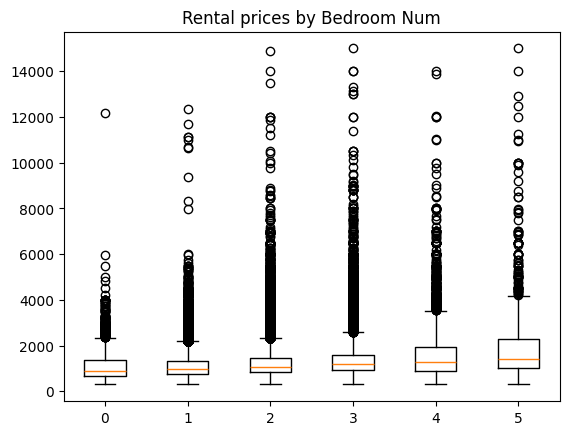

In [42]:
# Boxplot of rental prices by bedroom number
bed_levels = [0,1,2,3,4,5]
data_by_bed = [df[df["beds"]==b]["price"] for b in bed_levels]

plt.figure()
plt.boxplot(data_by_bed,labels=[str(b) for b in bed_levels])
plt.title('Rental prices by Bedroom Num')
plt.show()

/var/folders/hd/1hvfjm_11r70xv174w4my_hw0000gn/T/ipykernel_10266/2402424917.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_bed,labels=[str(a) for a in property_type])


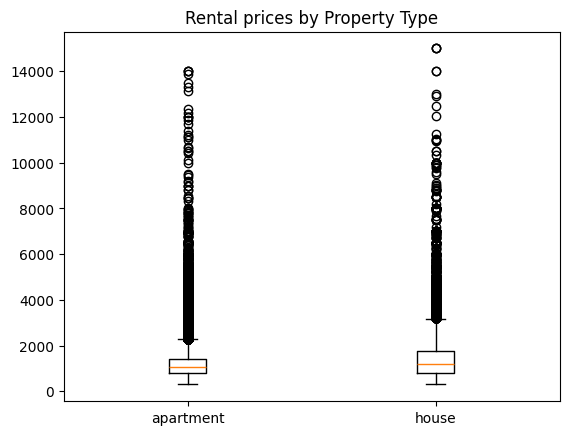

In [43]:
# Boxplot of rental prices by property type
property_type = ["apartment", "house"]
data_by_bed = [df[df["type"]==a]["price"] for a in property_type]

plt.figure()
plt.boxplot(data_by_bed,labels=[str(a) for a in property_type])
plt.title('Rental prices by Property Type')
plt.show()

#### 3. Interpret what these boxplots reveal about how rent changes across bedrooms and property types
- It's quite weird actually. Like for a second I forgot how to interpret a box plot because of the amount of outliers (circles) present. It looks like the quartiles and median are so far off, it feels as if it should be better redistributed but I'm not sure how.  

### Task 3: Scatterplots (10 points)
1. Plot a scatterplot of rent vs. square footage. What trend (if any) do you observe?
2. Plot a scatterplot of bedrooms vs. bathrooms. Identify the most common floorplan clusters
(e.g., 1 bed/1 bath, 2 bed/2 ba

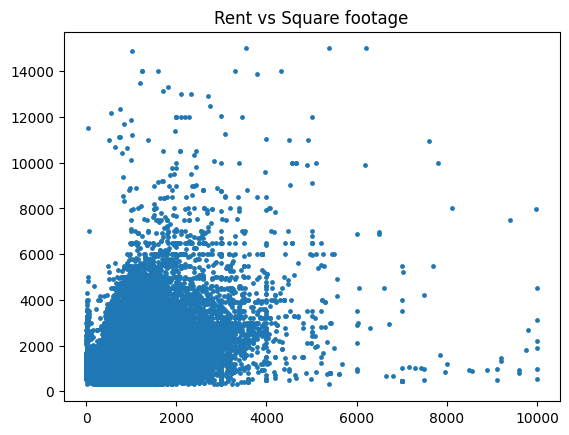

In [44]:
# Scatterplot of rent vs. square footage
plt.figure()
plt.scatter(df["sqfeet"], df["price"], s=6)
plt.title('Rent vs Square footage')
plt.show()

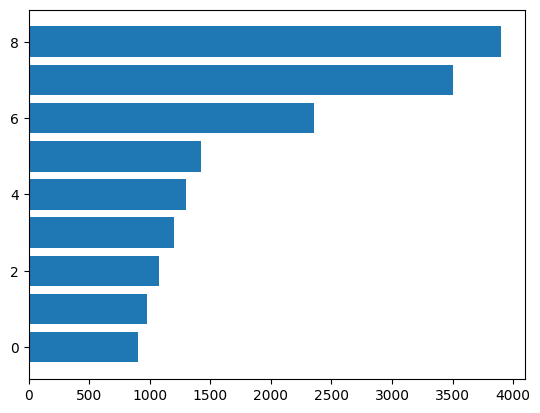

In [45]:
df_beds = df[df["beds"]<=500]
bedPriceGroups = df_beds.groupby(df_beds['beds'])['price'].median().reset_index()

#import seaborn as sns
plt.figure()
plt.barh(bedPriceGroups['beds'],bedPriceGroups['price'])
plt.show()

### Task 4: Group Comparisons (20 points)
1. Create a bar chart of the average rent by state (limit to the top 15 states by listing count).
2. Create a bar chart comparing the average rent of listings that allow cats vs. those that do not.
3. Create a bar chart comparing the average rent of listings that allow dogs vs. those that do not.
4. Use Seaborn’s barplot function to make a bar chart to compare the # beds V.S. prices.
5. Use Seaborn’s pic chart to compare the price ratios of different types of housing

In [46]:
states=df.groupby("state").agg(count=("id","size"),avg_rent=("price","mean")).reset_index()
top15 

NameError: name 'top15' is not defined

### Task 5: Optional Challenge (bonus 10 points)
1. Create a scatterplot using latitude and longitude to visualize the geographic distribution of rental
listings. For performance, you may downsample the data (e.g., plot 10,000 points).